## Data Science Challenge


**Instructions**
A telecom company wants to reduce churn in its customer base. You’ve received a dataset which contains telephone records of a set of customers.

The two main business questions to solve using this dataset are:

1.       What drives churn and what can we do about it?

2.       How can we create a propensity score (or churn probability) per customer?

You should present your answers to these questions in the interview, including relevant statistics and/or data visualizations. You will be asked about details on how you solved the task, so make sure you bring code, etc., that you’ve used. We expect you to spend 2-4 hours solving this case.

**Conclusiosnes and Recomendations after the analysis**

* We could observe that there is several variables that help to determine churn. A recommendation is to take care of those clients that make calls to customer services, also take care of those that have changes in their consumption during the day and also take care of those clients that have international plan.
* It is possible to create rules that help to specify promotions and measures to apply to those that seems to have more propensity to churn. These can be done through decision trees, association rules, between others.
* The performance of the models could be improved by incorporating additional features which include dynamic interactions (time), and more interactions between variables.
* In the future, it might be possible to perform a controlled experiment using the results of the machine learning algorithms to generate better understanding and data for simulations.
* This work has been made using R + python and spark. The combinations of these tools in one script can be used to get the best of each one.




## **NOTE:** 
All this work is oganized in a **pdf** for better inderstanding.

In [146]:
import warnings
warnings.filterwarnings('ignore') # Disable warnings

In [147]:
# PYSPARK INITIALIZATION
import os
import sys

In [148]:
# Configuration properties of Apache Spark
#sc.stop()
from pyspark import SparkConf
from pyspark.sql import SparkSession

APP_NAME = 'pyspark_python'
MASTER = 'local[*]'

conf = SparkConf().setAppName(APP_NAME)
conf = conf.setMaster(MASTER)
spark = SparkSession.builder.config(conf = conf).getOrCreate()
sc = spark.sparkContext


In [149]:
# OTHER 
import pandas as pd

In [150]:
#time start to running
import datetime
#Calculamos el tiempo de ejecucion
timestart= datetime.datetime.now()

# VARIABLES 

* State: State
* Account_length: 
* Area_code: postal code
* phone number: numbar of each client
* International_plan: yes/no + international plan contracted
* Voice_mail_plan: yes/no + voice mail activated
* Number_mail_messages: total number of voice email messages
* Total_day_minutes: average minutes of voice calls during day (granularity ?)
* Total_day_calls: average number of calls during the day (granularity ?)
* Total_day_charge: average spending on day calls (granularity ?)
* Total_eve_minutes: average minutes of voice calls during evening (granularity ?)
* Total_eve_calls: average number of voice calls during evening (granularity ?)
* Total_eve_charge: average spending on voice calls during evening (granularity ?)
* Total_night_minutes: average minutes of voice calls during the night (granularity ?)
* Total_night_calls: average number of voice calls during the night (granularity ?)
* Total_night_charge: average spending on voice calls during the night (granularity ?)
* Total_intl_minutes: average minutes on international calls (granularity ?)
* Total_intl_calls: average number of international calls (granularity ?)
* Total_intl_charge: average spending on international calls (granularity ?)
* NUmber Customer_service_calls: number of calls to customer service
* Churned:  FALSE (non churner) TRUE (churner)

In [151]:
# load data
#modelDataFile = "ChurnCaseDataset/churn.data.txt" # train 
modelDataFile = "ChurnCaseDataset/churn.all.txt"
#modelDataFile = "ChurnCaseDataset/churn.test.txt" # test

#df = spark.read.option("header", "false") \
#    .option("delimiter", ",") \
#    .option("inferSchema", "true") \
#    .csv(modelDataFile)
CV_data = spark.read\
  .format('org.apache.spark.sql.execution.datasources.csv.CSVFileFormat')\
  .option('header', 'false')\
  .option('inferSchema', 'true')\
  .load(modelDataFile)


#CV_data.toPandas().head()
print(CV_data.toPandas().shape)

(5000, 21)


In [152]:
# by default 200 batched
#Input data streams is divided into batches(rdd's) and them processed by Spark.
spark.conf.set('spark.sql.shuffle.partitions', '5') # you can change the number and see the differences in time


In [153]:
#names
names = ['state', 'account_length', 'area_code', 'phone_number', 'international_plan', 'voice_mail_plan',  
         'number_vmail_messages', 'total_day_minutes', 'total_day_calls', 'total_day_charge', 'total_eve_minutes',
         'total_eve_calls', 'total_eve_charge', 'total_night_minutes', 'total_night_calls', 'total_night_charge', 
         'total_intl_minutes', 'total_intl_calls', 'total_intl_charge', 'number_customer_service_calls', 'Churn']


In [154]:
CV_data = CV_data.toDF(*names)
CV_data.toPandas().head()

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,Churn
0,KS,128.0,415.0,382-4657,no,yes,25.0,265.1,110.0,45.07,...,99.0,16.78,244.7,91.0,11.01,10.0,3.0,2.70,1.0,False.
1,OH,107.0,415.0,371-7191,no,yes,26.0,161.6,123.0,27.47,...,103.0,16.62,254.4,103.0,11.45,13.7,3.0,3.70,1.0,False.
2,NJ,137.0,415.0,358-1921,no,no,0.0,243.4,114.0,41.38,...,110.0,10.30,162.6,104.0,7.32,12.2,5.0,3.29,0.0,False.
3,OH,84.0,408.0,375-9999,yes,no,0.0,299.4,71.0,50.90,...,88.0,5.26,196.9,89.0,8.86,6.6,7.0,1.78,2.0,False.
4,OK,75.0,415.0,330-6626,yes,no,0.0,166.7,113.0,28.34,...,122.0,12.61,186.9,121.0,8.41,10.1,3.0,2.73,3.0,False.


## PREPARING DATA

* Transform categorical data to 0-1 values. To process them numerically.

In [155]:
#change the type of the variable area_code
from pyspark.sql.functions import col , column
CV_data = CV_data.withColumn("area_code", col("area_code").cast("int"))
CV_data = CV_data.withColumn("area_code", col("area_code").cast("string"))

In [156]:
CV_data.printSchema()

root
 |-- state: string (nullable = true)
 |-- account_length: double (nullable = true)
 |-- area_code: string (nullable = true)
 |-- phone_number: string (nullable = true)
 |-- international_plan: string (nullable = true)
 |-- voice_mail_plan: string (nullable = true)
 |-- number_vmail_messages: double (nullable = true)
 |-- total_day_minutes: double (nullable = true)
 |-- total_day_calls: double (nullable = true)
 |-- total_day_charge: double (nullable = true)
 |-- total_eve_minutes: double (nullable = true)
 |-- total_eve_calls: double (nullable = true)
 |-- total_eve_charge: double (nullable = true)
 |-- total_night_minutes: double (nullable = true)
 |-- total_night_calls: double (nullable = true)
 |-- total_night_charge: double (nullable = true)
 |-- total_intl_minutes: double (nullable = true)
 |-- total_intl_calls: double (nullable = true)
 |-- total_intl_charge: double (nullable = true)
 |-- number_customer_service_calls: double (nullable = true)
 |-- Churn: string (nullable = 

In [157]:
# TRANSFORM CATEGORICAL VARIABLES TO BINARY

def binary_transformation(CV_data, var):    
    from pyspark.ml.feature import StringIndexer
    new_var = var + '_'
    indexer = StringIndexer(inputCol= var, outputCol=new_var).fit(CV_data)
    CV_data = indexer.transform(CV_data)
    CV_data = CV_data.drop(var) # prueba colocando colums = var
    return(CV_data)

In [158]:

def one_hot_transformation(CV_data, var):    
    from pyspark.ml.feature import OneHotEncoder
    new_var = var + '_'
    indexer = OneHotEncoder()\
    .setInputCol(var)\
    .setOutputCol(new_var)
    CV_data = indexer.transform(CV_data)
    CV_data = CV_data.drop(var)
    return(CV_data)

In [159]:
var = "Churn"
CV_data = binary_transformation(CV_data, var)
CV_data.groupBy('Churn_').count().show()
# churn (1)/no_churn (0)

+------+-----+
|Churn_|count|
+------+-----+
|   0.0| 4293|
|   1.0|  707|
+------+-----+



In [160]:
##
var = "voice_mail_plan"
CV_data = binary_transformation(CV_data, var)
CV_data.groupBy('voice_mail_plan_').count().show()
##

+----------------+-----+
|voice_mail_plan_|count|
+----------------+-----+
|             0.0| 3677|
|             1.0| 1323|
+----------------+-----+



In [161]:
var = "international_plan"
CV_data = binary_transformation(CV_data, var)
CV_data.groupBy('international_plan_').count().show()

+-------------------+-----+
|international_plan_|count|
+-------------------+-----+
|                0.0| 4527|
|                1.0|  473|
+-------------------+-----+



In [162]:
#CV_data.groupby(['state', 'area_code']).count().show()

In [163]:
#CV_data.toPandas().groupby(['state', 'area_code']).size()

In [164]:
#CV_data.toPandas().groupby(['Churn_', 'number_customer_service_calls']).size()

In [165]:
CV_data.toPandas().shape

(5000, 21)

In [166]:
# TRANSFORM CATEGORICAL VARIABLES TO BINARY

def from_categorical_to_dummies(CV_data, var):
 
    CV_data_2 = CV_data.toPandas()
    
    df = pd.get_dummies(CV_data_2[var])
    #columns and tranformation
    col = list(df.columns)
    # Join the dummy variables to the main dataframe
    df_new = pd.concat([CV_data_2, df], axis=1)
    df_new[col] = df_new[col].apply(pd.to_numeric, downcast='float')

    CV_data = spark.createDataFrame(df_new) #schema=mySchema
    return(CV_data)


In [167]:
#var = 'area_code'
#one_hot_transformation(CV_data, var)

In [168]:
# the indexer in pyspark serves to chagen the categorical 
#variables to numbers (this is better that the function below), for now we let it in this way.
var = 'area_code'
new_var = 'area_code_1'
from pyspark.ml.feature import StringIndexer
i =StringIndexer(inputCol= var, outputCol=new_var).fit(CV_data)
i = i.transform(CV_data)
# indexer = StringIndexer(inputCol= var, outputCol=new_var).fit(CV_data)
#i.toPandas().head()
i.groupBy('area_code_1').count().show()

+-----------+-----+
|area_code_1|count|
+-----------+-----+
|        0.0| 2495|
|        1.0| 1259|
|        2.0| 1246|
+-----------+-----+



In [169]:
var = 'area_code'
CV_data =from_categorical_to_dummies(CV_data, var)
CV_data.toPandas().head()

,state,account_length,area_code,phone_number,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,...,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,Churn_,voice_mail_plan_,international_plan_,408,415,510
0,KS,128.0,415,382-4657,25.0,265.1,110.0,45.07,197.4,99.0,...,10.0,3.0,2.70,1.0,0.0,1.0,0.0,0,1,0
1,OH,107.0,415,371-7191,26.0,161.6,123.0,27.47,195.5,103.0,...,13.7,3.0,3.70,1.0,0.0,1.0,0.0,0,1,0
2,NJ,137.0,415,358-1921,0.0,243.4,114.0,41.38,121.2,110.0,...,12.2,5.0,3.29,0.0,0.0,0.0,0.0,0,1,0
3,OH,84.0,408,375-9999,0.0,299.4,71.0,50.90,61.9,88.0,...,6.6,7.0,1.78,2.0,0.0,0.0,1.0,1,0,0
4,OK,75.0,415,330-6626,0.0,166.7,113.0,28.34,148.3,122.0,...,10.1,3.0,2.73,3.0,0.0,0.0,1.0,0,1,0


In [170]:
var = 'state'
CV_data =from_categorical_to_dummies(CV_data, var)

In [171]:
# change the last variables created to continuous
CV_data =CV_data.toPandas()
col = list(CV_data.columns)[-54:]
CV_data[col] = CV_data[col].apply(pd.to_numeric, downcast='float')

In [172]:
CV_data = spark.createDataFrame(CV_data)

In [173]:
type(CV_data)

pyspark.sql.dataframe.DataFrame

In [174]:
# eliminate variables that are not necessary anymore
drop_list = ['state', 'phone_number', 'area_code', '510', 'CA']
CV_data = CV_data.select([column for column in CV_data.columns if column not in drop_list])

## DESCRIPTIVE ANALYSIS

In [175]:
from pyspark.mllib.stat import Statistics
import pandas as pd

# result can be used w/ seaborn's heatmap
def compute_correlation_matrix(df, method='pearson'):
    df_rdd = df.rdd.map(lambda row: row[0:])
    corr_mat = Statistics.corr(df_rdd, method=method)
    corr_mat_df = pd.DataFrame(corr_mat,
                    columns=df.columns, 
                    index=df.columns)
    return corr_mat_df

In [176]:
# numerical values  
CV_data_2 = CV_data.toPandas().iloc[:,:-52]
CV_data_2 = spark.createDataFrame(CV_data_2)
# boolean
CV_data_bool = CV_data.toPandas().iloc[:,18:]
CV_data_bool = spark.createDataFrame(CV_data_bool)
#CV_data_bool.toPandas().head()

In [177]:
cr = compute_correlation_matrix(CV_data_2)

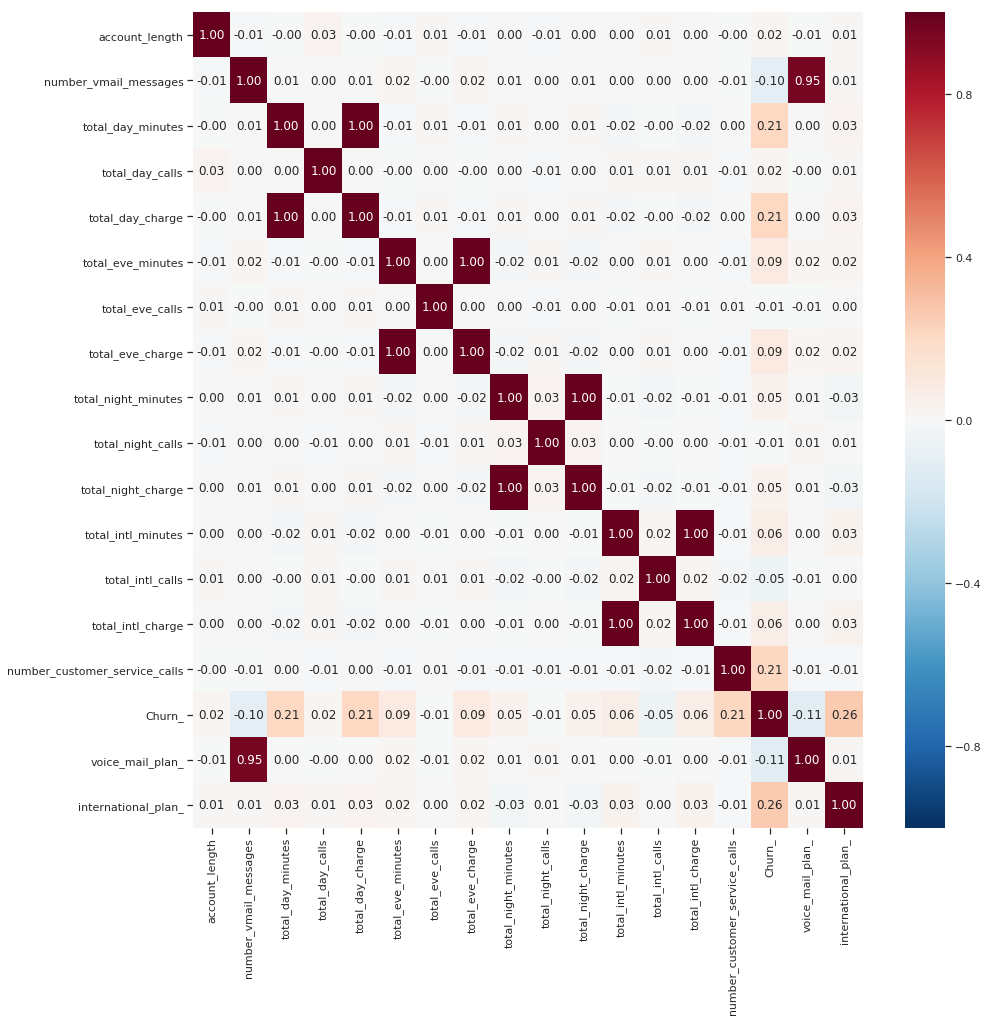

In [178]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(cr,  vmin = -1, vmax = 1, center = 0, annot=True, fmt=".2f", annot_kws={"size": 12}, ax= ax, cmap="RdBu_r")
plt.show()


There are lineal correlations between some features, these are: 

* total_day_minutes vs total_day_charge
* total_eve_minutes vs total_eve_charge
* total_night_minutes vs total_night_charge
* total_intl_minutes vs total_intl_charge
* number vmail messages vs. voice_mail_plan

**Notes:**

* To avoid multicollineality issues due to redudant variables, we eliminate those variables that high correlations between then (we will eliminate x_charge, but before we create a variable for the level of spend)
* Check interactions between variables would be interesting

In [179]:
## new variables
#from pyspark.sql.functions import avg,  lit, when, col

#mean_total_day_charge = CV_data_2.groupBy().avg("total_day_charge").take(1)[0][0]

#total_eve_charge
#mean_total_eve_charge = CV_data_2.groupBy().avg("total_eve_charge").take(1)[0][0]
#total_night_charge
#mean_total_night_charge = CV_data_2.groupBy().avg("total_night_charge").take(1)[0][0]
#total_intl_charg
#mean_total_intl_charge = CV_data_2.groupBy().avg("total_intl_charge").take(1)[0][0]
#total
#mean =  1.1*(mean_total_eve_charge + mean_total_day_charge + mean_total_night_charge +mean_total_intl_charge)
#mean

# local calls
#new_column = when(
#    col("total_day_charge") + col("total_eve_charge") + col("total_night_charge") + col("total_intl_charge")  < mean, 
#    0.0).otherwise(1.0) #1: high 0: low

#CV_data_2 = CV_data_2.withColumn('consume_high', new_column) # we chech the correlations and this 
#variable is not correlated with the other

#CV_data_2.groupBy('consume_high').count().show()
#CV_data_2.approxQuantile("total_day_charge", [0.75], 0)


In [180]:
# eliminate variables that are not necessary because are correlated
drop_list = ['total_eve_charge', 'total_night_charge', 'total_intl_charge', 'total_day_charge', 'voice_mail_plan']
CV_data_2 = CV_data_2.select([column for column in CV_data_2.columns if column not in drop_list])
CV_data_2.toPandas().head()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_eve_minutes,total_eve_calls,total_night_minutes,total_night_calls,total_intl_minutes,total_intl_calls,number_customer_service_calls,Churn_,voice_mail_plan_,international_plan_
0,128.0,25.0,265.1,110.0,197.4,99.0,244.7,91.0,10.0,3.0,1.0,0.0,1.0,0.0
1,107.0,26.0,161.6,123.0,195.5,103.0,254.4,103.0,13.7,3.0,1.0,0.0,1.0,0.0
2,137.0,0.0,243.4,114.0,121.2,110.0,162.6,104.0,12.2,5.0,0.0,0.0,0.0,0.0
3,84.0,0.0,299.4,71.0,61.9,88.0,196.9,89.0,6.6,7.0,2.0,0.0,0.0,1.0
4,75.0,0.0,166.7,113.0,148.3,122.0,186.9,121.0,10.1,3.0,3.0,0.0,0.0,1.0


In [181]:
#select a sample
sampled_data = CV_data_2.sample(False, 0.10).toPandas()
sampled_data.shape

(524, 14)

In [182]:
import seaborn as sns
sns.set(style="ticks")

col_1 = list([ 'number_vmail_messages',
       'total_day_minutes', 'number_customer_service_calls', 'international_plan_',  #'consume_high',
        'Churn_'])

col_2 = list(['total_night_calls', 
       'total_intl_minutes', 'total_intl_calls',
        'Churn_', 'total_day_calls', 'account_length',
              'total_eve_minutes', 'total_eve_calls',
              'total_night_minutes'
       ])


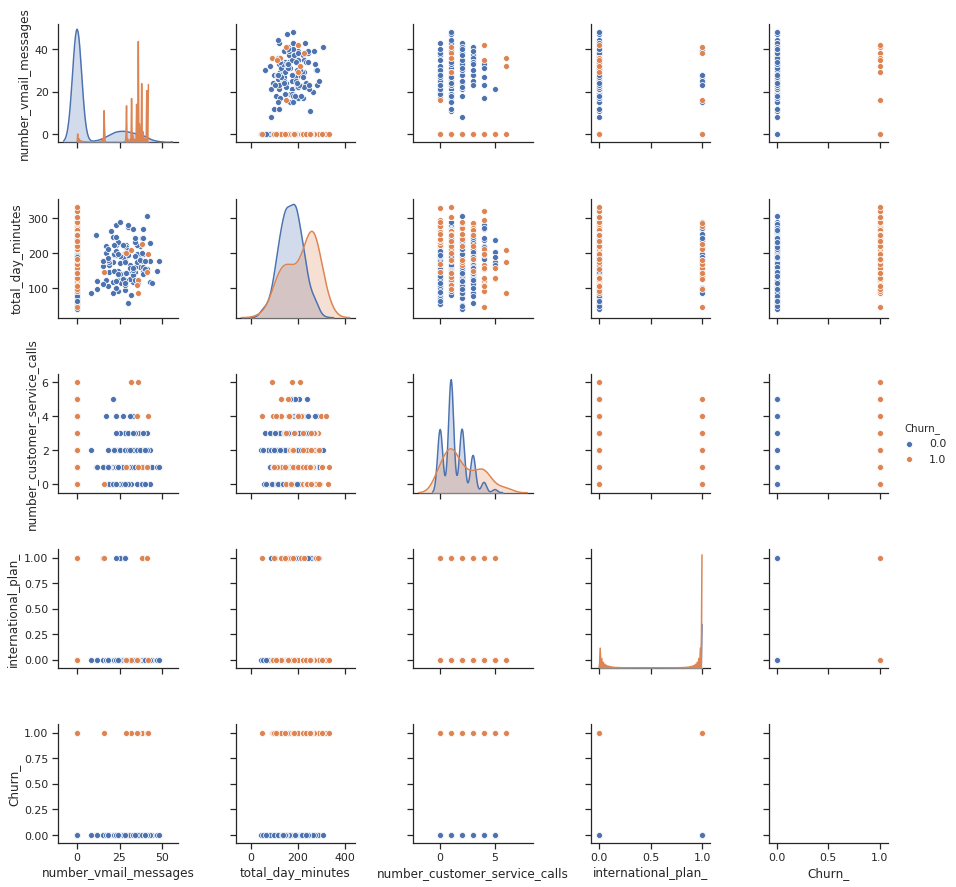

In [183]:
df = sampled_data #.toPandas()
sns.pairplot(df.loc[:, col_1], hue="Churn_")#

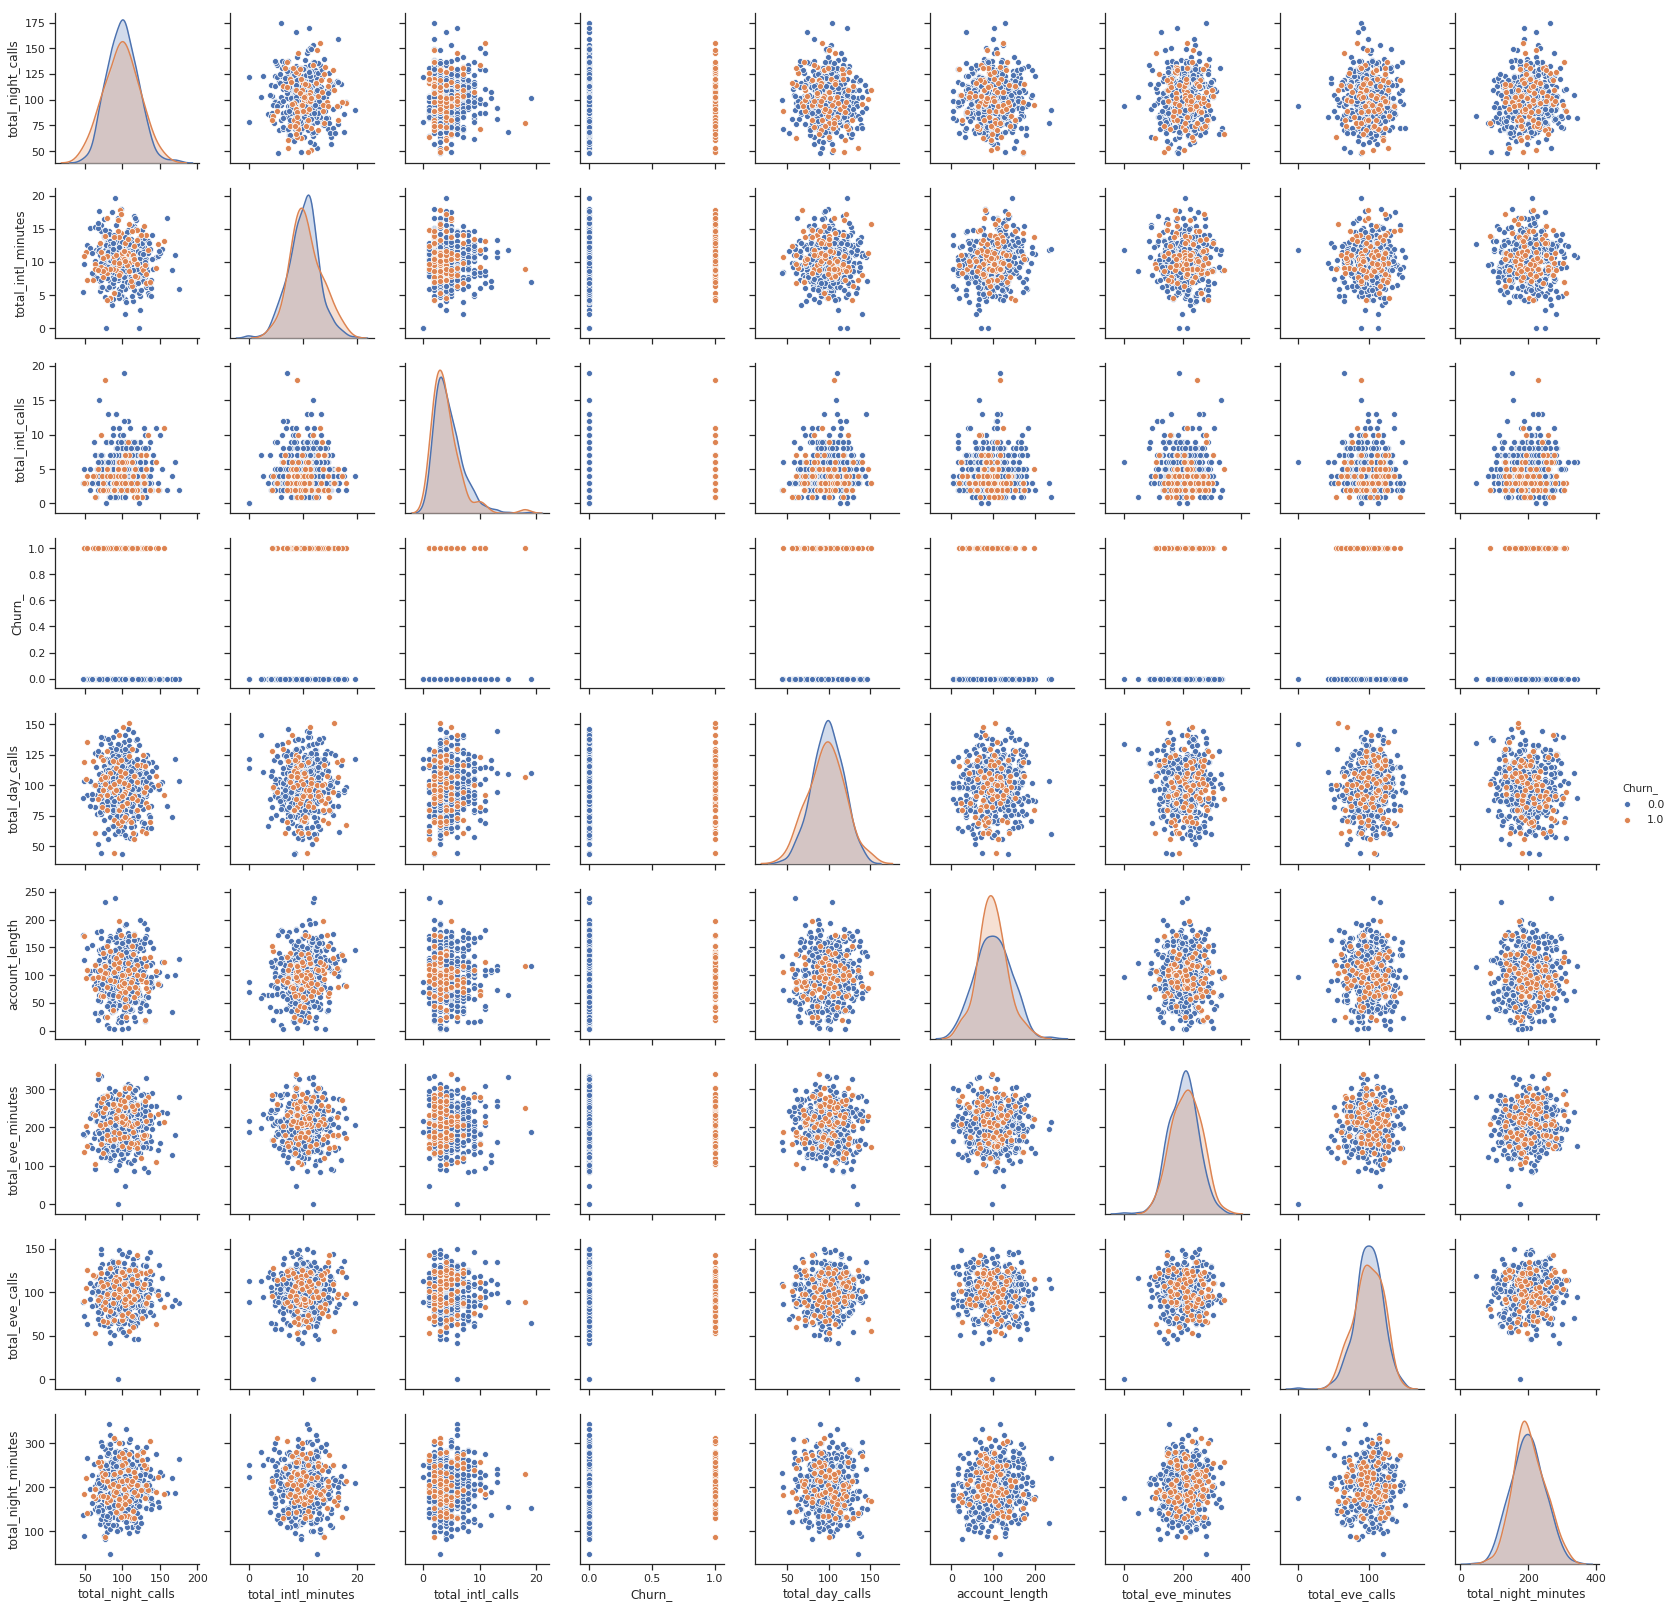

In [184]:
df = sampled_data #.toPandas()
sns.pairplot(df.loc[:, col_2], hue="Churn_")#

In [93]:
# numpy to dataframe to pyspark.data.frame

cols = CV_data_2.columns + CV_data_bool.columns

CV_data_2 = spark.createDataFrame(pd.concat([CV_data_2.toPandas(), CV_data_bool.toPandas()], axis=1))



In [94]:

y = CV_data_2.toPandas().loc[:, 'Churn_']
X = CV_data_2.toPandas().drop(columns = ['Churn_'], axis=1)


## USE SMOTE FOR UMBALACED DATA

SMOTE (Synthetic Minority Oversampling TEchnique) consists of add elements of the minority class, based on those that already exist. It works randomly picking a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors.

In [95]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print('Before OverSampling, the shape of train_X: {}'.format(X_train.shape))
print('Before OverSampling, the shape of train_y: {} \n'.format(y_train.shape))

print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))


Before OverSampling, the shape of train_X: (3500, 65)
Before OverSampling, the shape of train_y: (3500,) 

Before OverSampling, counts of label '1': 505
Before OverSampling, counts of label '0': 2995 



In [96]:
sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

After OverSampling, the shape of train_X: (5990, 65)
After OverSampling, the shape of train_y: (5990,) 

After OverSampling, counts of label '1': 2995
After OverSampling, counts of label '0': 2995


In [97]:
#combine data TRAIN
import numpy as np
col_X = list(X)
col_y = list(['Churn_'])
cols = col_X + col_y
X_train_res_ = pd.DataFrame(X_train_res, columns= col_X)
y_train_res_ = pd.DataFrame(y_train_res, columns= col_y)
#X_train_res_.head()
#y_train_res_.head()

train_1 = pd.DataFrame( np.concatenate( (X_train_res_, y_train_res_), axis=1 ), columns= cols )
#train_1.head()
train = spark.createDataFrame(train_1)
#train.toPandas().head()
type(train)

pyspark.sql.dataframe.DataFrame

In [98]:

#combine data Test
X_test_res_ = pd.DataFrame(X_test, columns= col_X)
y_test_res_ = pd.DataFrame(y_test.ravel(), columns= col_y)

#y_test_res_.head()

test_1 = pd.DataFrame( np.concatenate( (X_test_res_, y_test_res_), axis=1 ), columns= cols )
#test_1.head()
#test_1.head()
test = spark.createDataFrame(test_1)

In [99]:
numeric_features = cols
from pyspark.ml import Pipeline
from pyspark.ml.feature import VectorAssembler, StringIndexer

label_indexer = StringIndexer(inputCol = 'Churn_', outputCol = 'label') 
reduced_numeric_cols = numeric_features[0:len(numeric_features)-1]
 
assembler = VectorAssembler(
    inputCols = reduced_numeric_cols,
    outputCol = 'features')
assembler

VectorAssembler_4bdfaa28ed21

## LOGISTIC REGRESSION (función)

#Parameters

* **Threshold** :probability threshold for yes/no decision
* **maxIter** : max number of interations
* **regParam** regularization multiplier for overfitting prevention
* **elasticNetParam** L1 vs L2 (REGULARIZATION METHOS)

The elastic net parameter α set to 1, it is equivalent to a Lasso model. On the other hand, if α is set to 0, the trained model reduces to a ridge regression model.

* **Standardization** Scales numbers based on (xi-mean(xi)/sd(xi))


In [100]:
import pyspark
from pyspark.ml.evaluation import BinaryClassificationEvaluator, MulticlassClassificationEvaluator
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder


def evaluate_model(results):
    """ Prints the confusion matrix, f1-score, precision, recall and accuracy of the model """
    tn = results.filter((results.prediction == 0)&(results.label==0)).count() * 1.0 # true negative
    fp = results.filter((results.prediction == 1)&(results.label==0)).count() * 1.0 # false positive
    fn = results.filter((results.prediction == 0)&(results.label==1)).count() * 1.0 # false negative
    tp = results.filter((results.prediction == 1)&(results.label==1)).count() * 1.0 # true positive
    print("Confusion Matrix")
    print("TN:{} | FP:{}".format(tn,fp))
    print("FN:{} | TP: {}".format(fn, tp))
    print("--------------")
    accuracy = (tp+tn)/(tn+fp+fn+tp)
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    #print(precision)
    #print(recall)
    f1 = 2.0 * (precision * recall)/(precision + recall)
    print("F1-Score: {}".format(f1))
    print("Precision: {}".format(precision))
    print("Recall: {}".format(recall))
    print("Accuracy: {}".format(accuracy))

In [101]:
import matplotlib.pyplot as plt
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [102]:
standardization = True #False #
elastic_net_param = 0.0
reg_param = .01
max_iter = 20
family = "binomial"


from pyspark.ml.classification import LogisticRegression
LRclassifier = LogisticRegression(labelCol = 'label', featuresCol = 'features',
                                 #maxIter = max_iter, regParam = reg_param, elasticNetParam = elastic_net_param, 
                        standardization = standardization, family = family)
LRpipeline = Pipeline(stages=[label_indexer, assembler, LRclassifier])


In [103]:
paramGrid = (ParamGridBuilder()
             .addGrid(LRclassifier.regParam, [0.01, 0.5, 2.0])
             #.addGrid(LRclassifier.elasticNetParam, [0.0, 0.5, 1.0])
             #.addGrid(LRclassifier.maxIter, [1, 5, 10])
             .build())

cv_lr = CrossValidator(estimator=LRpipeline,\
                       estimatorParamMaps=paramGrid,\
                       evaluator=\
                   BinaryClassificationEvaluator(metricName=\
                                "areaUnderPR"),\
                       numFolds=5, seed=42) 


In [104]:
#cv_lr.bestModel()

In [105]:
# TRAIN
# cvModel uses the best model found from the Cross Validation
# Evaluate best model
cvModel_lr = cv_lr.fit(train)
bestModel = cvModel_lr.bestModel # OVER THE TRAINING SET 

In [106]:
#BEST PARAM
print('Best Param (regParam): ', bestModel.stages[-1]._java_obj.getRegParam())
print('Best Param (MaxIter): ', bestModel.stages[-1]._java_obj.getMaxIter())
print('Best Param (elasticNetParam): ', bestModel.stages[-1]._java_obj.getElasticNetParam())

Best Param (regParam):  0.01
Best Param (MaxIter):  100
Best Param (elasticNetParam):  0.0


In [107]:
# COEFS AND INTERCEPT
print("Coefficients: " + str(bestModel.stages[-1].coefficients))
print("Intercept: " + str(bestModel.stages[-1].intercept))

Coefficients: [0.0018337614608040067,0.00425634730427773,0.01249650475070132,0.0038384325642327314,0.007391992886060575,-0.0018050631964768031,0.004689912937510966,-0.004912112417988488,0.07653578345086252,-0.05148322829080548,0.6938226316254503,-1.249038169501209,2.5081734875606414,-0.003386929543850393,-0.1836638828876907,-1.3260421075433209,-0.6308520175596369,-0.5704935094020186,-0.42016143785865145,-1.1109881212077086,-0.29635243304583175,0.037594209110486713,-0.55759028296309,-0.17342393408048712,-1.1747953010484355,-1.8522730676277028,-0.645486936917138,-1.3667549364103448,-1.1407510158697622,-0.1913429788069876,-0.19340791503201876,-0.1454841869560499,-0.19239081433134486,-0.31806350035317116,0.005798303477104278,-0.17959083400262996,-0.08739595596442486,0.010899331787985207,-0.7557478040115309,-0.20333914436345804,0.8026731772984025,-0.9285672313171346,-0.805594011713244,-1.4357076427054274,-0.4308974257087931,0.16163843003565342,-0.9647497150797498,-0.3262380292548357,0.23793

In [108]:
# p-values

In [109]:
summary =  bestModel.stages[-1].summary
print(summary)
#print("Coefficient Standard Errors: " + str(summary.coefficientStandardErrors))
#print("T Values: " + str(summary.tValues))
#print("P Values: " + str(summary.pValues))

In [110]:
#dir(bestModel.stages[-2])
#help(bestModel.stages[-2])
#bestModel.stages[-1].lowerBoundsOnCoefficients()

## IMPACT
Here we can see the impact of the variables. Some variables have positive impacts and other negatives. This give us an idea of the importance of the variables. It is necessary to do a p-value analysis in order to understand which variables are significant or not.

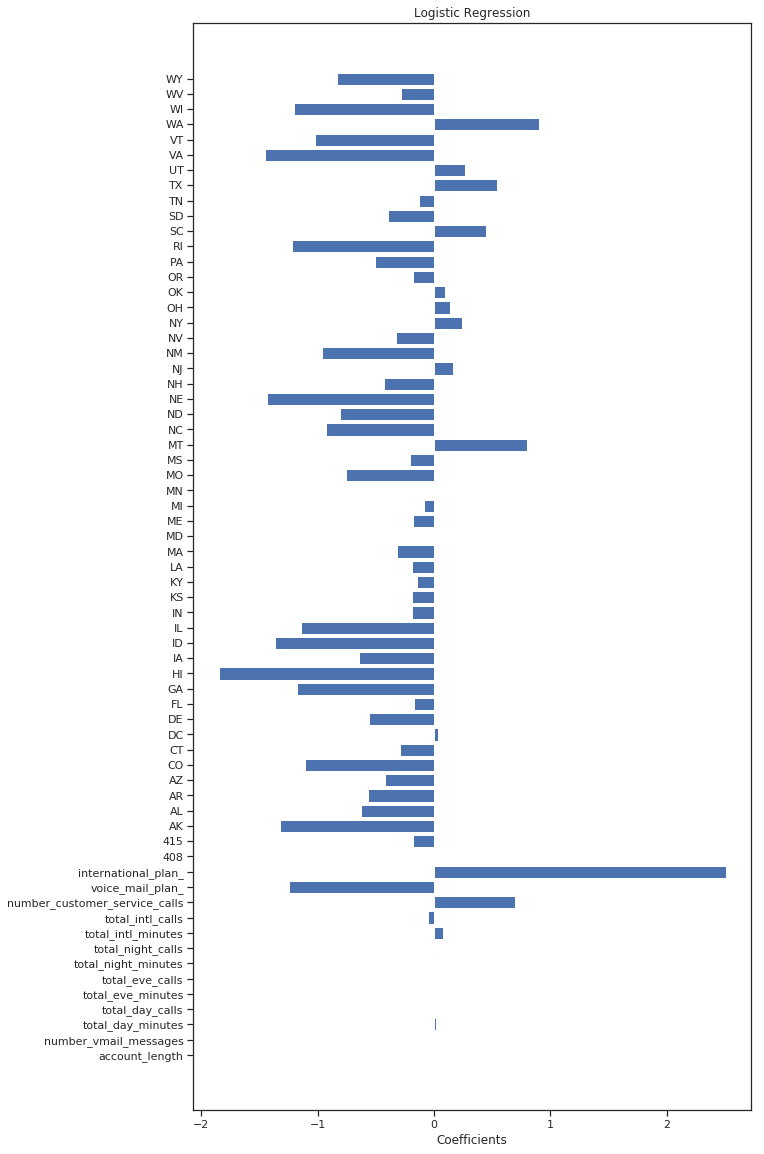

In [111]:
# GRAPHS IN PYTHON
inputColumns=cols[:-1]
y_pos = np.arange(len(inputColumns))
#y_pos
importances =  bestModel.stages[-1].coefficients
fig, ax = plt.subplots(figsize=(10,20))
#width = 0.75 # the width of the bars 
ax.barh(y_pos, importances);
plt.yticks(y_pos, inputColumns);
plt.xlabel('Coefficients');
plt.title('Logistic Regression');

In [112]:
#Curva ROC
trainingSummary = bestModel.stages[2].summary
roc = trainingSummary.roc.toPandas()

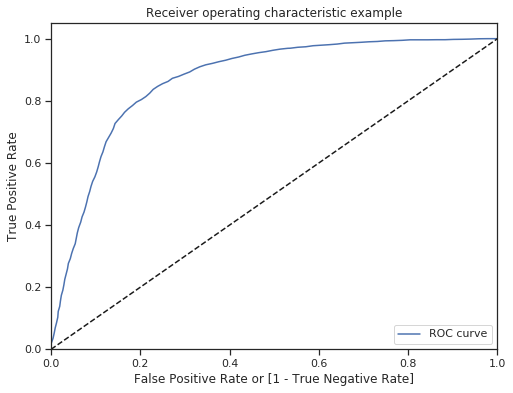

In [113]:
plt.figure(figsize=(8, 6))
plt.plot( roc['FPR'],roc['TPR'], label='ROC curve' ) # (area = %0.2f)' % auc_score
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [114]:
### train
lr_results = cvModel_lr.transform(train)
evaluate_model(lr_results)

Confusion Matrix
TN:2357.0 | FP:638.0
FN:554.0 | TP: 2441.0
--------------
F1-Score: 0.8037537043134672
Precision: 0.7927898668398831
Recall: 0.815025041736227
Accuracy: 0.8010016694490818


Normalized confusion matrix
[[0.7869783  0.2130217 ]
 [0.18497496 0.81502504]]


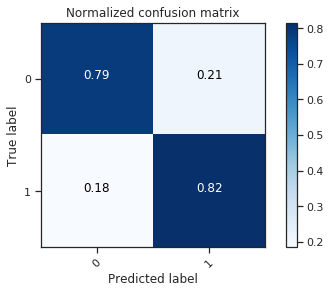

In [115]:
predictions = lr_results.select("label", "features", "rawPrediction","probability","prediction")
from sklearn.metrics import confusion_matrix
y_true = predictions.select("label")
y_true = y_true.toPandas()

y_pred = predictions.select("prediction")
y_pred = y_pred.toPandas()

y_true
cnf_matrix = confusion_matrix(y_true, y_pred)

# Plot normalized confusion matrix
class_temp =['0', '1']
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_temp, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [116]:
# Evaluate model
evaluator = BinaryClassificationEvaluator(rawPredictionCol="prediction")
print("Test: Area Under ROC: " + str(evaluator.evaluate(predictions, {evaluator.metricName: "areaUnderROC"})))

Test: Area Under ROC: 0.8010016694490818


In [117]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Select (prediction, true label) and compute test error
evaluator = MulticlassClassificationEvaluator(
    labelCol="label", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print("Test Error = %g" % (1.0 - accuracy))

Test Error = 0.198998


In [118]:
### test
lr_results = cvModel_lr.transform(test)
evaluate_model(lr_results)

Confusion Matrix
TN:991.0 | FP:307.0
FN:52.0 | TP: 150.0
--------------
F1-Score: 0.4552352048558422
Precision: 0.3282275711159737
Recall: 0.7425742574257426
Accuracy: 0.7606666666666667


In [119]:
predictions = lr_results.select("label", "features", "rawPrediction","probability","prediction")
predictions.show(5)

+-----+--------------------+--------------------+--------------------+----------+
|label|            features|       rawPrediction|         probability|prediction|
+-----+--------------------+--------------------+--------------------+----------+
|  0.0|(65,[0,2,3,4,5,6,...|[2.45460963237097...|[0.92089789148572...|       0.0|
|  0.0|(65,[0,1,2,3,4,5,...|[2.21668413690334...|[0.90173777895841...|       0.0|
|  0.0|(65,[0,2,3,4,5,6,...|[1.53500090695842...|[0.82273682869345...|       0.0|
|  1.0|(65,[0,2,3,4,5,6,...|[-2.4093593573669...|[0.08246177735944...|       1.0|
|  0.0|(65,[0,2,3,4,5,6,...|[2.05040833015862...|[0.88598887170882...|       0.0|
+-----+--------------------+--------------------+--------------------+----------+
only showing top 5 rows



Normalized confusion matrix
[[0.76348228 0.23651772]
 [0.25742574 0.74257426]]


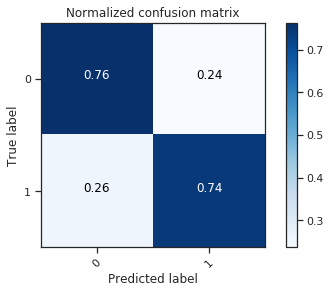

In [120]:
from sklearn.metrics import confusion_matrix
y_true = predictions.select("label")
y_true = y_true.toPandas()

y_pred = predictions.select("prediction")
y_pred = y_pred.toPandas()

cnf_matrix = confusion_matrix(y_true, y_pred)

# Plot normalized confusion matrix
class_temp =['0', '1']
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_temp, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [121]:
# Evaluate model
evaluator = BinaryClassificationEvaluator(rawPredictionCol="prediction")
print("Test: Area Under ROC: " + str(evaluator.evaluate(predictions, {evaluator.metricName: "areaUnderROC"})))

Test: Area Under ROC: 0.7530282689285878


In [122]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Select (prediction, true label) and compute test error
evaluator = MulticlassClassificationEvaluator(
    labelCol="label", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print("Test Error = %g" % (1.0 - accuracy))

Test Error = 0.239333


## LOGISTIC REGRESSION (GeneralizedLinearRegression) with p-values

In [123]:
#GeneralizedLinearRegression
from pyspark.ml.regression import GeneralizedLinearRegression
glr = GeneralizedLinearRegression(family="binomial", link="logit", maxIter=10, 
regParam=0.0)
glrpipeline = Pipeline(stages=[label_indexer, assembler, glr])

# coefficients
model = glrpipeline.fit(train)

summary = model.stages[-1].summary


In [124]:
print("Coefficient Standard Errors: " + str(summary.coefficientStandardErrors))
print("T Values: " + str(summary.tValues))
print("P Values: " + str(summary.pValues))
print("Dispersion: " + str(summary.dispersion))
print("Null Deviance: " + str(summary.nullDeviance))
print("Residual Degree Of Freedom Null: " + str(summary.residualDegreeOfFreedomNull))
print("Deviance: " + str(summary.deviance))
print("Residual Degree Of Freedom: " + str(summary.residualDegreeOfFreedom))
print("AIC: " + str(summary.aic))

Coefficient Standard Errors: [0.0009006743242163228, 0.011286539366811373, 0.0006526984655151864, 0.0018233683634939109, 0.0007121628605408954, 0.0018210424089969803, 0.0007496078810093247, 0.001841842064927277, 0.013581467758152657, 0.014740460029565803, 0.02799188162286882, 0.36159744886990214, 0.12402714343984884, 0.10352403390767448, 0.09031573172000375, 0.5100387655926567, 0.39002501361564257, 0.42833405401268315, 0.4228726215006636, 0.44463604378124855, 0.40247334026542064, 0.4055582923786336, 0.3943501783857104, 0.41228983195953545, 0.47073117286503774, 0.4707795962579725, 0.4401209472092518, 0.43809020222270817, 0.44620507503501744, 0.4003834731127695, 0.40448846313744685, 0.41042261793455365, 0.413603724768126, 0.41272645344233094, 0.3929616924652043, 0.3931641578842222, 0.39032245187229964, 0.37338289664381624, 0.425661573978312, 0.39752863024684537, 0.37896690735076494, 0.43634534302132194, 0.4373881194753491, 0.4657368504546121, 0.4074345326890077, 0.38791077910538013, 0.42

## Gradient Boosted Trees

In [125]:
from pyspark.ml.classification import GBTClassifier

BT = GBTClassifier(labelCol="label", featuresCol="features")
#pipeline_svc = Pipeline(stages=[assembler, scaler, svc])
pipeline_BT = Pipeline(stages=[label_indexer, assembler, BT])

# Gradient Boosted Trees
# not performing grid search for gbt because it will be too memomry intensive
# will use optimal paramters from the samll dataset
paramGrid = ParamGridBuilder() \
            .addGrid(BT.minInstancesPerNode,[5]) \
            .addGrid(BT.maxDepth,[7])\
            .addGrid(BT.subsamplingRate,[0.75])\
            .build()

cv_gbt = CrossValidator(estimator=pipeline_BT,\
                        estimatorParamMaps=paramGrid,\
                        evaluator=BinaryClassificationEvaluator(metricName="areaUnderPR"),\
                        numFolds=5,\
                        seed=42
                       )
cvModel_gbt = cv_gbt.fit(train)

In [126]:

gbt_results = cvModel_gbt.transform(train)

Normalized confusion matrix
[[0.98397329 0.01602671]
 [0.02904841 0.97095159]]


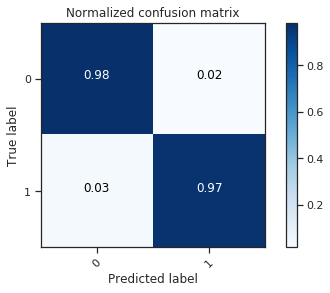

In [127]:
predictions = gbt_results.select("label", "features", "rawPrediction","probability","prediction")
from sklearn.metrics import confusion_matrix
y_true = predictions.select("label")
y_true = y_true.toPandas()

y_pred = predictions.select("prediction")
y_pred = y_pred.toPandas()

y_true
cnf_matrix = confusion_matrix(y_true, y_pred)

# Plot normalized confusion matrix
class_temp =['0', '1']
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_temp, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [128]:
# Evaluate model
evaluator = BinaryClassificationEvaluator(rawPredictionCol="prediction")
print("Test: Area Under ROC: " + str(evaluator.evaluate(predictions, {evaluator.metricName: "areaUnderROC"})))

Test: Area Under ROC: 0.9774624373956594


In [129]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Select (prediction, true label) and compute test error
evaluator = MulticlassClassificationEvaluator(
    labelCol="label", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print("Test Error = %g" % (1.0 - accuracy))

Test Error = 0.0225376


In [130]:
cvModel_gbt_best = cvModel_gbt.bestModel
importances = cvModel_gbt_best.stages[-1].featureImportances.toArray()
#len(importances)
#importances

In [192]:
help(pd.DataFrame)

Help on class DataFrame in module pandas.core.frame:

class DataFrame(pandas.core.generic.NDFrame)
 |  Two-dimensional size-mutable, potentially heterogeneous tabular data
 |  structure with labeled axes (rows and columns). Arithmetic operations
 |  align on both row and column labels. Can be thought of as a dict-like
 |  container for Series objects. The primary pandas data structure.
 |  
 |  Parameters
 |  ----------
 |  data : numpy ndarray (structured or homogeneous), dict, or DataFrame
 |      Dict can contain Series, arrays, constants, or list-like objects
 |  
 |      .. versionchanged :: 0.23.0
 |         If data is a dict, argument order is maintained for Python 3.6
 |         and later.
 |  
 |  index : Index or array-like
 |      Index to use for resulting frame. Will default to RangeIndex if
 |      no indexing information part of input data and no index provided
 |  columns : Index or array-like
 |      Column labels to use for resulting frame. Will default to
 |      Ran

## IMPORTANCE 

We can see that the variables that more contribute in the detection of churn are those that you can see in the figure. It is clear the number to customer service calls is a good proxi for churn, total day minutes and international plan seems to be very important.


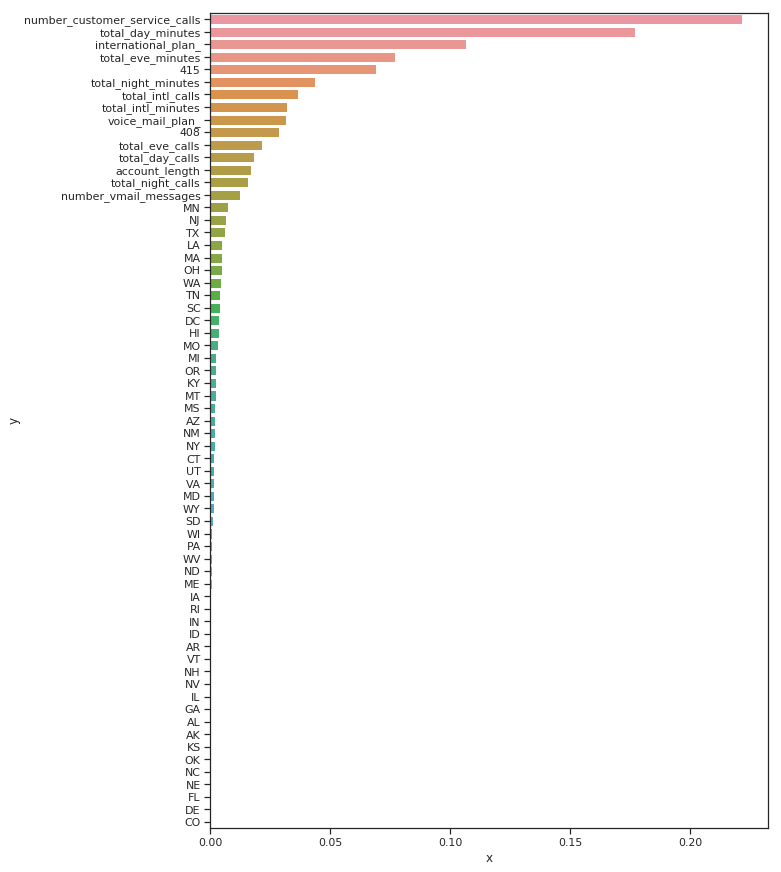

In [227]:
dh = pd.DataFrame(list(zip(importances, inputColumns)), columns =  ['x', 'y'])
dh = dh.sort_values(by='x', ascending=False) #.head()
#dh.tail()

_, axes = plt.subplots(1, 1, sharey=True, figsize=(10, 15)) 

                       
sns.barplot(x='x', y='y', data=dh) #, ax = axes[1]

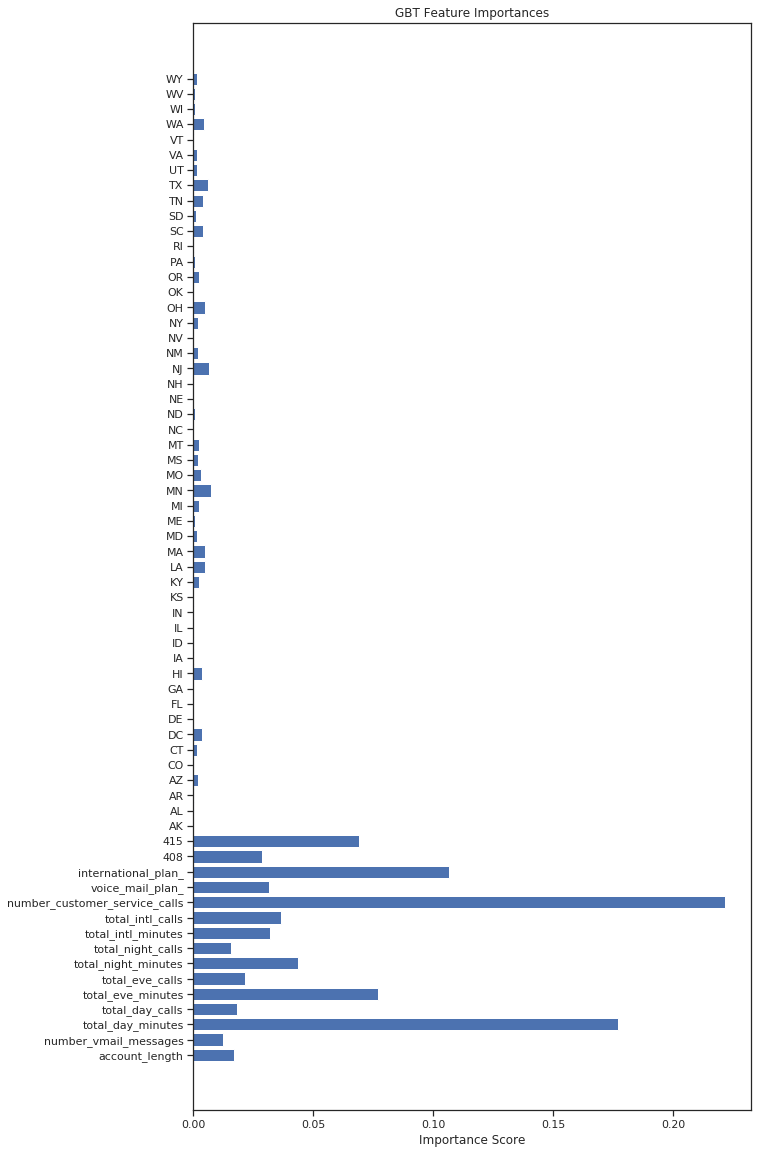

In [131]:
inputColumns=cols[:-1]
y_pos = np.arange(len(inputColumns))
#y_pos

fig, ax = plt.subplots(figsize=(10,20))
ax.barh(y_pos, importances);
plt.yticks(y_pos, inputColumns);
plt.xlabel('Importance Score');
plt.title('GBT Feature Importances');

In [132]:
#test
gbt_results = cvModel_gbt.transform(test)
evaluate_model(gbt_results)

Confusion Matrix
TN:1250.0 | FP:48.0
FN:45.0 | TP: 157.0
--------------
F1-Score: 0.7714987714987716
Precision: 0.7658536585365854
Recall: 0.7772277227722773
Accuracy: 0.938


Normalized confusion matrix
[[0.96302003 0.03697997]
 [0.22277228 0.77722772]]


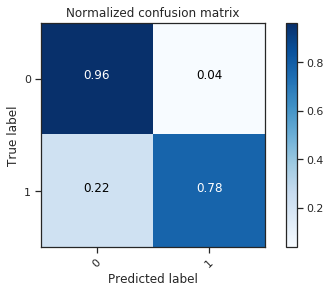

In [133]:
predictions = gbt_results.select("label", "features", "rawPrediction","probability","prediction")
from sklearn.metrics import confusion_matrix
y_true = predictions.select("label")
y_true = y_true.toPandas()

y_pred = predictions.select("prediction")
y_pred = y_pred.toPandas()

y_true
cnf_matrix = confusion_matrix(y_true, y_pred)

# Plot normalized confusion matrix
class_temp =['0', '1']
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_temp, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [134]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Select (prediction, true label) and compute test error
evaluator = MulticlassClassificationEvaluator(
    labelCol="label", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print("Test Error = %g" % (1.0 - accuracy))

Test Error = 0.062


# MULTILAYER PERCEPTRON

Allow interactions between variables....

In [135]:
len(cols) - 1

65

In [136]:
from pyspark.ml.classification import MultilayerPerceptronClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.mllib.feature import StandardScaler

# specify layers for the neural network:
# input layer (features), two intermediate of size 
# and output of size (classes)
layers = [len(cols) - 1, 365,180,2]
# create the trainer and set its parameters

MPC = MultilayerPerceptronClassifier(labelCol="label", featuresCol="features",
                                     maxIter= 500, 
                                     layers=layers, 
                                     blockSize=128, 
                                     seed=1234
                                    )
#scaler = StandardScaler(inputCol="features", outputCol="features", withMean=True, withStd=True)
pipeline_MPC = Pipeline(stages=[label_indexer, assembler,  MPC])


MPCmodel = pipeline_MPC.fit(train)
MPCmodel

PipelineModel_1c54b64a959f

In [137]:
# Make predictions.
mpc_results = MPCmodel.transform(train)


Normalized confusion matrix
[[0.91085142 0.08914858]
 [0.0687813  0.9312187 ]]


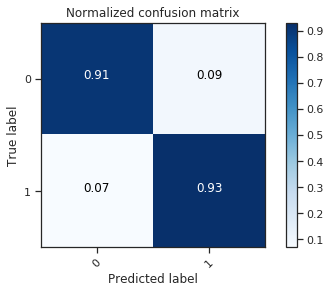

In [138]:
predictions = mpc_results.select("label", "features", "rawPrediction","probability","prediction")
from sklearn.metrics import confusion_matrix
y_true = predictions.select("label")
y_true = y_true.toPandas()

y_pred = predictions.select("prediction")
y_pred = y_pred.toPandas()

y_true
cnf_matrix = confusion_matrix(y_true, y_pred)

# Plot normalized confusion matrix
class_temp =['0', '1']
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_temp, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [139]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Select (prediction, true label) and compute test error
evaluator = MulticlassClassificationEvaluator(
    labelCol="label", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print("Test Error = %g" % (1.0 - accuracy))

Test Error = 0.0789649


In [140]:
#TEST
# Make predictions.
predictions = MPCmodel.transform(test)
evaluate_model(predictions)

Confusion Matrix
TN:1079.0 | FP:219.0
FN:102.0 | TP: 100.0
--------------
F1-Score: 0.3838771593090211
Precision: 0.31347962382445144
Recall: 0.49504950495049505
Accuracy: 0.786


Normalized confusion matrix
[[0.83127889 0.16872111]
 [0.5049505  0.4950495 ]]


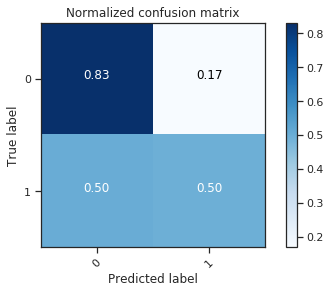

In [141]:
predictions = predictions.select("label", "features", "rawPrediction","probability","prediction")
from sklearn.metrics import confusion_matrix
y_true = predictions.select("label")
y_true = y_true.toPandas()

y_pred = predictions.select("prediction")
y_pred = y_pred.toPandas()

y_true
cnf_matrix = confusion_matrix(y_true, y_pred)

# Plot normalized confusion matrix
class_temp =['0', '1']
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_temp, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [142]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Select (prediction, true label) and compute test error
evaluator = MulticlassClassificationEvaluator(
    labelCol="label", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print("Test Error = %g" % (1.0 - accuracy))

Test Error = 0.214


In [143]:
# Calculamos el tiempo empleado en la ejecución
timeend = datetime.datetime.now()
timedelta = round((timeend-timestart).total_seconds(), 2) 
print("Tiempo tomado en crear el modelo: " + str(timedelta) + " segundos")

Tiempo tomado en crear el modelo: 1976.02 segundos


In [144]:
599.91/60

9.9985